In [38]:
import pandas as pd
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay

df_games = pd.read_csv("games_cleaned.csv")
df_games['target'] = df_games['winner'].astype(str) + '-' + df_games['victory_status'].astype(str)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19113 entries, 0 to 19112
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19113 non-null  object 
 1   rated           19113 non-null  bool   
 2   created_at      19113 non-null  float64
 3   last_move_at    19113 non-null  float64
 4   turns           19113 non-null  int64  
 5   victory_status  19113 non-null  object 
 6   winner          19113 non-null  object 
 7   increment_code  19113 non-null  object 
 8   white_id        19113 non-null  object 
 9   white_rating    19113 non-null  int64  
 10  black_id        19113 non-null  object 
 11  black_rating    19113 non-null  int64  
 12  moves           19113 non-null  object 
 13  opening_eco     19113 non-null  object 
 14  opening_name    19113 non-null  object 
 15  opening_ply     19113 non-null  int64  
 16  target          19113 non-null  object 
dtypes: bool(1), float64(2), int64(4

Text(0.5, 1.05, 'Scatterplot and histogram of pairs of variables color coded by winner')

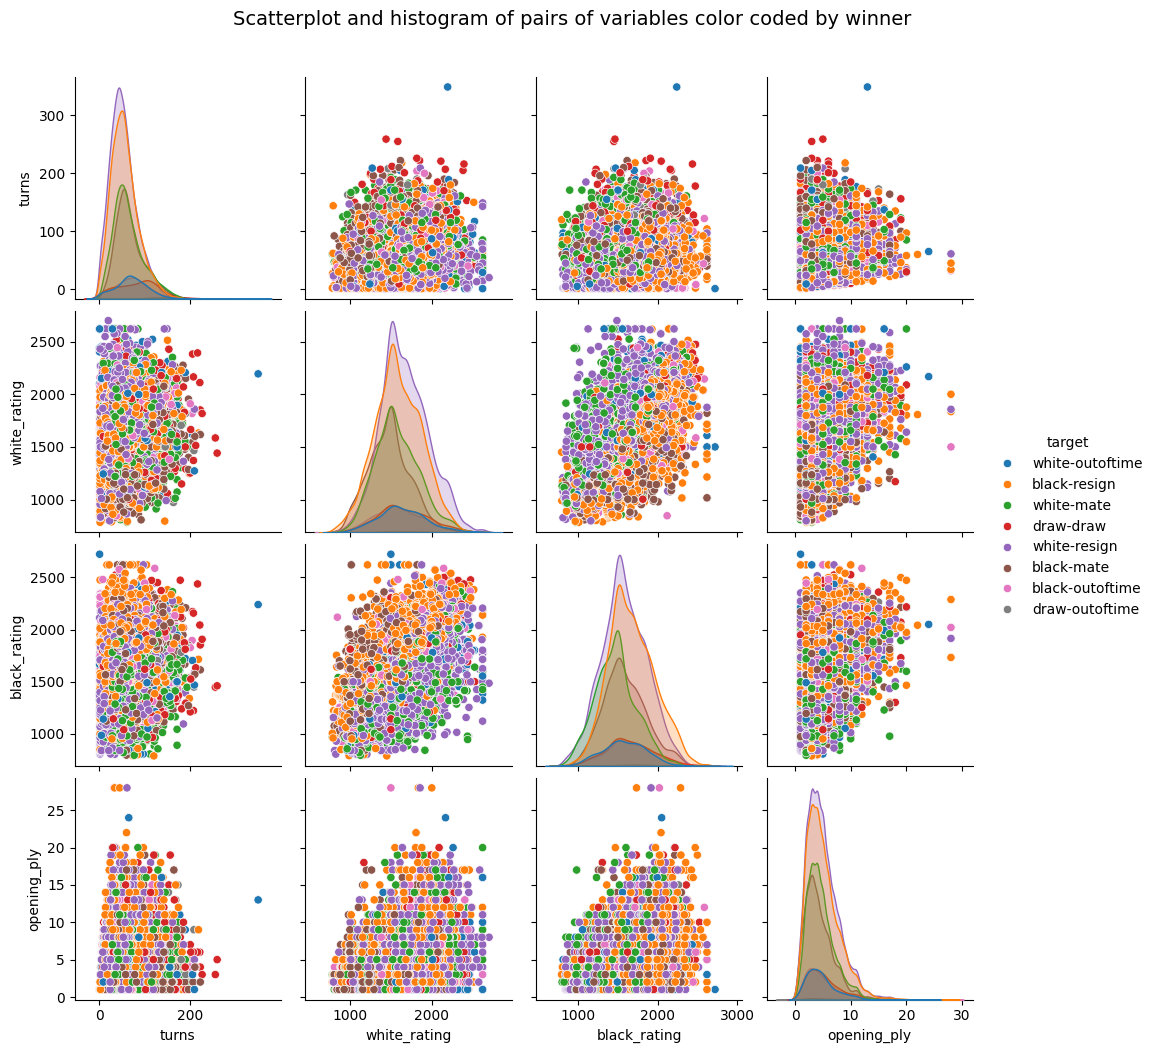

In [39]:
dataset = df_games[['turns', 'target', 'white_rating', 'black_rating', 'opening_eco', 'opening_ply']]
plot = sns.pairplot(dataset, hue='target')
plot.figure.suptitle("Scatterplot and histogram of pairs of variables color coded by winner",
                  fontsize = 14,
                  y = 1.05)

In [40]:
print(dataset['target'].unique())
print(dataset['opening_eco'].unique())
len(dataset['opening_eco'].unique())

['white-outoftime' 'black-resign' 'white-mate' 'draw-draw' 'white-resign'
 'black-mate' 'black-outoftime' 'draw-outoftime']
['D10' 'B00' 'C20' 'B27' 'D00' 'C50' 'B01' 'A00' 'C02' 'C00' 'C57' 'C41'
 'C55' 'A40' 'B20' 'A25' 'B21' 'D01' 'C45' 'D06' 'B52' 'D20' 'B06' 'A45'
 'B77' 'A21' 'B70' 'B23' 'B76' 'C21' 'A80' 'A20' 'A04' 'C26' 'C44' 'E10'
 'A41' 'C01' 'D02' 'A10' 'C18' 'A47' 'C10' 'D80' 'D30' 'D41' 'B03' 'B29'
 'B02' 'B13' 'B57' 'E20' 'E11' 'C40' 'C11' 'C28' 'A46' 'B30' 'A56' 'C65'
 'B90' 'B50' 'B51' 'E00' 'C70' 'B11' 'B22' 'B40' 'B31' 'B18' 'C61' 'C78'
 'B10' 'C42' 'D07' 'B32' 'C68' 'A22' 'C46' 'A02' 'C58' 'A03' 'B54' 'B12'
 'D03' 'D31' 'C69' 'A31' 'D46' 'C34' 'C48' 'C47' 'B24' 'C67' 'C60' 'E61'
 'C53' 'C23' 'B96' 'C54' 'A05' 'D92' 'A49' 'C22' 'C37' 'A09' 'A01' 'C88'
 'B34' 'C03' 'C33' 'A48' 'A11' 'A81' 'B05' 'B53' 'B08' 'C30' 'A15' 'B43'
 'C07' 'A34' 'D08' 'A30' 'A08' 'A13' 'D11' 'D50' 'A73' 'D35' 'D21' 'C64'
 'C15' 'B09' 'A52' 'E90' 'A06' 'B15' 'D17' 'A43' 'A65' 'B33' 'A67' 'C62'


365

In [41]:
dataset['target'] = LabelEncoder().fit_transform(dataset['target'])
encoder_opening = ce.BinaryEncoder(cols = ['opening_eco'])
encoded_data = encoder_opening.fit_transform(dataset)
encoded_data

C:\Users\gaell\AppData\Local\Temp\ipykernel_1908\2107705753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['target'] = LabelEncoder().fit_transform(dataset['target'])


,turns,target,white_rating,black_rating,opening_eco_0,opening_eco_1,opening_eco_2,opening_eco_3,opening_eco_4,opening_eco_5,opening_eco_6,opening_eco_7,opening_eco_8,opening_ply
0,13,6,1500,1191,0,0,0,0,0,0,0,0,1,5
1,16,2,1322,1261,0,0,0,0,0,0,0,1,0,4
2,61,5,1496,1500,0,0,0,0,0,0,0,1,1,3
3,5,3,1250,1002,0,0,0,0,0,0,1,0,0,4
4,33,7,1520,1423,0,0,0,0,0,0,1,0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19108,24,7,1691,1220,0,0,0,0,1,1,1,1,1,2
19109,82,0,1233,1196,0,0,0,1,0,0,1,0,1,2
19110,35,5,1219,1286,0,0,0,0,0,0,1,0,1,3
19111,109,7,1360,1227,0,1,0,0,1,1,0,1,1,4


In [42]:
y = encoded_data['target']
x = encoded_data.drop(['target'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

c:\Users\gaell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gaell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gaell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.28      0.26      0.27       527
           1       0.08      0.02      0.03       177
           2       0.38      0.47      0.42      1000
           3       0.09      0.03      0.05       166
           4       0.00      0.00      0.00         9
           5       0.29      0.22      0.25       651
           6       0.08      0.02      0.03       169
           7       0.41      0.54      0.46      1124

    accuracy                           0.36      3823
   macro avg       0.20      0.19      0.19      3823
weighted avg       0.32      0.36      0.33      3823



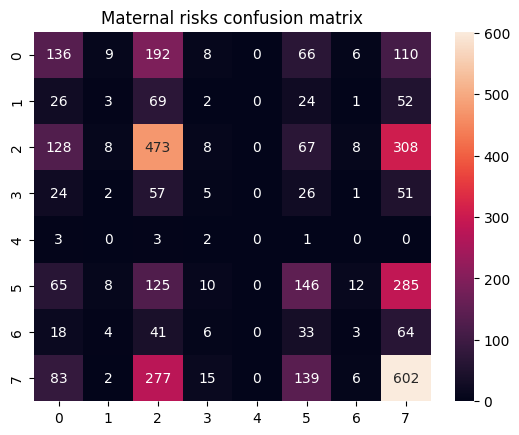

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix')
print(classification_report(y_test, y_pred))

C:\Users\gaell\AppData\Local\Temp\ipykernel_1908\388831962.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data = features_df_sorted, x='importances', y = 'features', palette = 'rocket')


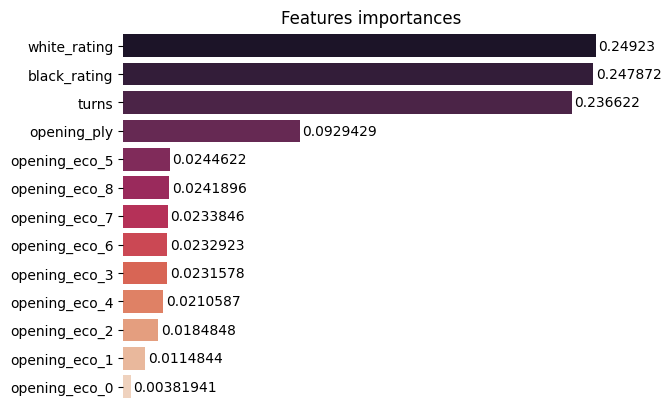

In [44]:
features_df = pd.DataFrame({'features' : rfc.feature_names_in_, 'importances' : rfc.feature_importances_})

features_df_sorted = features_df.sort_values(by='importances', ascending=False)

plot = sns.barplot(data = features_df_sorted, x='importances', y = 'features', palette = 'rocket')
sns.despine(bottom = True, left = True)
plot.set_title('Features importances')
plot.set(xlabel = None)
plot.set(ylabel = None)
plot.set(xticks = [])
for value in plot.containers:
    plot.bar_label(value, padding = 2)